#**Amplicons to Predict Shoot Weight**
### *B Kirtley Amos - Electical and Computer Engineering*



---

Hi all! This notebook is meant to be a primer to how an analysis of microbiome data could be performed in order to initially investigate the 16s amplicon data and then apply basic machine learning to predict shoot weight with amplicon data. Initial investigation allows an understanding of the general trends of the data and machine learning lets us investigate if our data can be used to predict components of interest.

Imports for all the code below. Please run first before anything else!

In [ ]:
!git clone https://github.com/BKAmos/Tutorials.git

# data preprocessing
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split

# linear regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# random forest
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# xgboost
from xgboost import XGBRegressor

Cloning into 'Tutorials'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), 136.47 KiB | 502.00 KiB/s, done.




---

###Introduction


This workshop will be showing both the workflow of basic data exploration in a microbiome study and a typical ML project approach. ### ADD SOME DATA ###

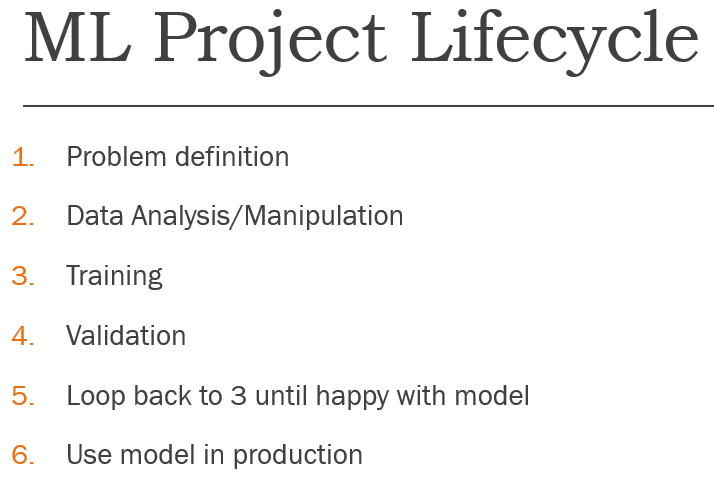


---

###Problem Definition


Calculate alpha and beta diversity across the samples.



---

### Data Analysis/Preprocessing


The first step we need to take is to look at our data. In the first cell you ran, you cloned a GitHub repo which contained the `car_data.csv` file. A few rows of this file are shown below.

In [ ]:
data = pd.read_csv('./Tutorials/MLTutorial/taxonomy.csv')
data

,Feature_ID,Result,top_ref,identity,Domain,Phylum,Class,Order,Family,Genus
0,a20f500706b0005fe884f0ecf17a8d8c,perfect,LjNodule209=LjNodule210=LjNodule211=LjNodule21...,100.0,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Mesorhizobium
1,8e2326d224a3adc2221c2c1932ab7c6b,perfect,LjRoot149,100.0,Bacteria,Bacteroidetes,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium
2,fca661a60cfccd85f8f8ce0970e5960d,perfect,LjRoot20=LjRoot37=LjRoot38=LjRoot129=LjRoot138...,100.0,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,0
3,26224096c4e323245382bff89c608796,perfect,LjRoot221,100.0,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Allorhizobium-Neorhizobium-Pararhizobium-Rhizo...
4,89314f2de8555c64042a0774d1e71967,perfect,LjRoot21=LjRoot60=LjRoot63=LjRoot68=LjRoot73=L...,100.0,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Pseudoxanthomonas
...,...,...,...,...,...,...,...,...,...,...
4589,897f7d3e6299c2ff082b81fc3928e79c,other,NaN,NaN,Bacteria,Proteobacteria,Gammaproteobacteria,0,0,0
4590,4c623c5e0644db52dd75dd6e8de9c47a,other,NaN,NaN,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Burkholderia-Caballeronia-Paraburkholderia
4591,fb61441d805a4d1c01b88bf8ea26af4e,other,NaN,NaN,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,0
4592,bc226805e266b5e5878283444923042b,other,NaN,NaN,Bacteria,Actinobacteria,Actinobacteria,Propionibacteriales,Propionibacteriaceae,Micropruina


First let's check out what datatypes we have in our dataset. If the data types are not what we expect, we could run into problems with our preprocessing and later on with our training.

In [ ]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In general, you can't provide text input to a ML model. This is a problem since a lot of our categories (make, model, fuel, transmission, etc) are text based. Luckily, it is pretty easy with Numpy to turn all this text into numbers. This is done using one-hot encoding which is shown in the code below:

Now let's do this for the whole dataset. First we will pop the categorical columns off of our dataset and store them into individual variables.

In [ ]:
make = data.pop('Make')
model = data.pop('Model')
fuel = data.pop('Engine Fuel Type')
trans = data.pop('Transmission Type')
drive = data.pop('Driven_Wheels')
market = data.pop('Market Category')
size = data.pop('Vehicle Size')
style = data.pop('Vehicle Style')
print("Done")

Done


Here we check our work and see that the only columns left in data are numerical.

In [ ]:
data

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120
11910,2012,300.0,6.0,4.0,23,16,204,56670
11911,2012,300.0,6.0,4.0,23,16,204,50620
11912,2013,300.0,6.0,4.0,23,16,204,50920


Now let's perform our one-hot encoding on all the columns we popped off the original dataframe.

In [ ]:
oh_make = pd.get_dummies(make)
oh_model = pd.get_dummies(model)
oh_fuel = pd.get_dummies(fuel)
oh_trans = pd.get_dummies(trans)
oh_drive = pd.get_dummies(drive)
oh_market = pd.get_dummies(market)
oh_size = pd.get_dummies(size)
oh_style = pd.get_dummies(style)
print("Done")

Done


And finally we reappend these new columns back onto our original dataframe

In [ ]:
processed_data = pd.concat([data, oh_make, oh_model, oh_fuel, oh_trans, oh_drive, oh_market, oh_size, oh_style], axis=1)
processed_data

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Acura,Alfa Romeo,...,Convertible,Convertible SUV,Coupe,Crew Cab Pickup,Extended Cab Pickup,Passenger Minivan,Passenger Van,Regular Cab Pickup,Sedan,Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120,1,0,...,0,0,0,0,0,0,0,0,0,0
11910,2012,300.0,6.0,4.0,23,16,204,56670,1,0,...,0,0,0,0,0,0,0,0,0,0
11911,2012,300.0,6.0,4.0,23,16,204,50620,1,0,...,0,0,0,0,0,0,0,0,0,0
11912,2013,300.0,6.0,4.0,23,16,204,50920,1,0,...,0,0,0,0,0,0,0,0,0,0


One last thing to check before we train. If any of the values are missing in our dataset, they will be listed as NaN (not a number) in our dataframe. When we go to train, our algorithm won't know what to do with these values so we are going to go ahead and remove any rows with missing values now. We should also check for and remove any duplicated columns as well.

In [ ]:
processed_data.dropna(inplace=True)
processed_data = processed_data.loc[:,~processed_data.columns.duplicated()]
processed_data

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Acura,Alfa Romeo,...,Cargo Van,Convertible,Convertible SUV,Crew Cab Pickup,Extended Cab Pickup,Passenger Minivan,Passenger Van,Regular Cab Pickup,Sedan,Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120,1,0,...,0,0,0,0,0,0,0,0,0,0
11910,2012,300.0,6.0,4.0,23,16,204,56670,1,0,...,0,0,0,0,0,0,0,0,0,0
11911,2012,300.0,6.0,4.0,23,16,204,50620,1,0,...,0,0,0,0,0,0,0,0,0,0
11912,2013,300.0,6.0,4.0,23,16,204,50920,1,0,...,0,0,0,0,0,0,0,0,0,0




---

###Single Variable Linear Regression

While we could spend much more time going through our data to make it easier to train off of, I'm going to move on to training using linear regression due to time constraints for this session. We will be using a library called scikit-learn for this. Let's start with just using one variable to keep it simple. Can we predict the price of a car based only on the car's horsepower rating?

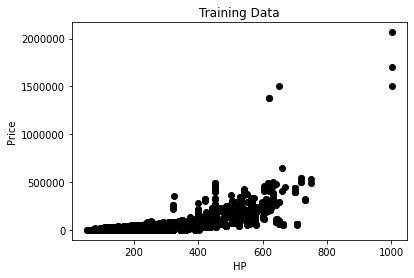

In [ ]:
# feel free to play with different features to use for X, ie Engine Cylinders, Year, etc
x_single = processed_data['Engine HP']
y_single = processed_data['MSRP']

# some of this code comes from https://pythonspot.com/linear-regression/

x_single = x_single.values.reshape(len(x_single),1)
y_single = y_single.values.reshape(len(y_single),1)

# Split the data into training/testing sets
x_single_train = x_single[:-250]
x_single_test = x_single[-250:]

# Split the targets into training/testing sets
y_single_train = y_single[:-250]
y_single_test = y_single[-250:]

# Plot outputs
plt.scatter(x_single_train, y_single_train,  color='black')
plt.title('Training Data')
plt.xlabel('HP')
plt.ylabel('Price')
plt.ticklabel_format(style='plain')

plt.show()

Above you can see a plot of HP vs Price for the cars in our dataset. Our goal now is to find the line of best fit for this data. This is where our linear regression training comes in.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


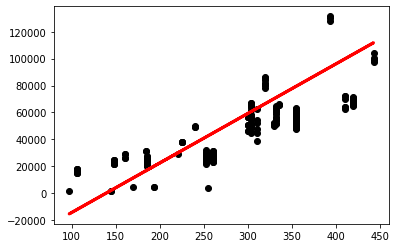

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(x_single_train, y_single_train)

# Plot outputs
plt.scatter(x_single_test, y_single_test,  color='black')
plt.plot(x_single_test, regr.predict(x_single_test), color='red',linewidth=3)

The plot above shows the X and Y validation data in black as before but now we have our line of best fit in red overlaid on the plot. We can now use our model to make predictions, as shown below.

In [ ]:
predict_x = 455

print(regr.predict([[predict_x]])) 

[[116221.35326076]]


It can be hard however to gauge the performance of this model based on predictions alone, especially in this case with only one feature being used. The coefficient of determination (or $R^2$) is a much better way to see how our linear regression model is doing. In general, a high $R^2$ value (close to 1) means the model is a good fit for the data. Below you can see the coefficient of determination of our linear regression model. 

In [ ]:
r_sq = metrics.r2_score(y_single_test, regr.predict(x_single_test))
print('coefficient of determination:', r_sq)

coefficient of determination: 0.2816568017146862


Looking at our coefficient of determination you should be able to conclude that this model does not do a very good job of predicting the MSRP of a car. This makes sense because we are only using a linear line for our predictions and using HP alone for our predicitions is not the best strategy for this task. If you look at the plot above closely you might notice something odd - some of our datapoints in our validation set have very low prices. Let's dig a bit deeper...

In [ ]:
print("Minimum MSRP: " + str(y_single_test.min()))
print("Instances of $2000 MSRP: " + str(data["MSRP"].value_counts()[2000]))
print(str(data["MSRP"].describe()))

Minimum MSRP: 2000
Instances of $2000 MSRP: 1036
count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: MSRP, dtype: float64


We have a minimum MSRP of \$2000 in our validation dataset which seems very suspect. What's worse is that we have over a thousand instances of a \$2000 MSRP in our whole dataset. When we look through our dataset we see that a lot of the cars listed from the early 1990s have the \$2000 MSRP. This makes me suspect that either this MSRP was used as a filler value for cars of that era or a zero was left out somewhere since this value is way too low to be reasonable. We are going to keep going with our dataset as is since these discrepencies don't seem to upset our overall quartile statistics too much. However this goes to show that you should always keep your eyes open for dataset issues like this. Fixing this dataset and seeing how that impacts your model perfomances would be a great exercise for you to get started using the code introduced in this workshop.

While this model is not great in terms of performance, hopefully the code above gives you an idea of the steps involved in training an ML model. If you want to go further with this, go ahead and replace HP in the X variable with one of the other columns to see if it improves performance. Another great step would be to try multivariable linear regression to see how much the results improve with more features.



---



###Decision Trees


There's only so far we can get in terms of accuracy with our model when all we have to work with is a straight line. Let's try a decision tree instead to see how that performs for our problem.

In [ ]:
x_tree = processed_data.drop('MSRP', axis=1)
y_tree = processed_data['MSRP']

x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree, y_tree, test_size=0.2)

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train_tree, y_train_tree)

y_pred = regressor.predict(x_test_tree)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_tree, y_pred))
print('Coefficient of Determination:', metrics.r2_score(y_test_tree, y_pred))

Mean Absolute Error: 3698.608152133755
Coefficient of Determination: 0.837350387818773


Here we can see what happens when we are able to use all our data. Take a look especially at the $R^2$ value this time. It's way better than when we were just using HP to try to predict the price. The mean absolute error gives us an idea of how far off, on average, our predictions are from the real prices of the cars. While ~$3000 may seem like a lot for the error, it is actually pretty good margin of error when thought of in the context of the entire price of a car.


---



###Random Forest


Now that we are starting to get some good results, let's see if we can do even better with some more complex techniques. What's better than one decision tree? What about a whole forest of decision trees? Run the code below to see what happens.

In [ ]:
x_forest = processed_data.drop('MSRP', axis=1)
y_forest = processed_data['MSRP']

x_train_forest, x_test_forest, y_train_forest, y_test_forest = train_test_split(x_forest, y_forest, test_size=0.2)

forest = RandomForestRegressor()
forest.fit(x_train_forest, y_train_forest)

y_pred = forest.predict(x_test_forest)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_forest, y_pred))
print('Coefficient of Determination:', metrics.r2_score(y_test_forest, y_pred))

Mean Absolute Error: 3187.32350484942
Coefficient of Determination: 0.9611561101498878


Take a look at the MAE and the $R^2$ values this time. While there is an element randomness in using Random Forest, the values you see should be an improvement over the Decision Tree we implemented before.



---



###XGBoost

Now let's move away from bagging and try a boost ensemble model, in this case XGBoost. This is one of the most popular ML algorithms you'll come across in Kaggle competitions and other such sites. Below is the code needed to create your XGBoost model and fit it to your training data.

In [ ]:
x_boost = processed_data.drop('MSRP', axis=1)
y_boost = processed_data['MSRP']

x_train_boost, x_test_boost, y_train_boost, y_test_boost = train_test_split(x_boost, y_boost, test_size=0.2)

boost = XGBRegressor()
boost.fit(x_train_boost, y_train_boost)

[17:01:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Now that our model is trained, let's see how it is doing on our data.

In [ ]:
p = boost.predict(x_test_boost)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_boost, p))
print('Coefficient of Determination:', metrics.r2_score(y_test_boost, p))

Mean Absolute Error: 6852.939424815846
Coefficient of Determination: 0.848083015091768


Perfomance on this dataset is pretty good for XGBoost. Like with Random Forest, there is randomness involved with the training of this model so you might see slightly different results each time you run the model fitting code. 



---



###Conclusion

This wraps up our whirlwind tour of machine learning. Hopefully this gives you a good starting point to try using some of these algorithms for your own projects. Some last pieces of advice: take some time to get familiar with all they hyperparameters of the algorithm you are using. I didn't have the time to get into that for this session but scikit learn and XGBoost both have a ton of helpful options you can play with for their algorithms. Finally, don't get discouraged if you start a project and end up with a bunch of errors. Google search is your friend and a large part of getting better at ML projects, just like normal programming, is making mistakes and learning from them. Thanks for your time and happy coding!